In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

from ram.analysis.run_manager import RunManager
from ram.analysis.model_selection.combo_search import CombinationSearch
from ram.analysis.statistics import get_stats, rollup_returns

In [2]:
RunManager.get_run_names('StatArbStrategy')

,RunName,RunDate,Completed,Description
0,run_0068,2018-03-06,True,"Sector 20, version 002"
1,run_0069,2018-03-07,True,"Sector 20, version 2 rerun with univ filtering"
2,run_0070,2018-03-19,True,"Sector 20, post refactor run"
3,run_0071,2018-03-21,True,"Sector 20, 2001 start date, 16cpu comp"
4,run_0072,2018-03-21,True,"Sector 20, 2001 start date, 64cpu comp"
5,run_0078,2018-04-18,True,"Sector 20, new pricing data"
6,run_0079,2018-04-25,True,Rerun with data since 2004
7,run_0080,2018-04-26,False,Rerun of version 24 data
8,run_0081,2018-04-30,True,New hyperparams
9,run_0085,2018-05-01,True,"new params, longer params/hyperparms"


In [3]:
run1 = RunManager('StatArbStrategy', 'run_0085', test_periods=0)
run2 = RunManager('StatArbStrategy', 'run_0090', test_periods=0)

In [4]:
run1.import_return_frame()
run2.import_return_frame()

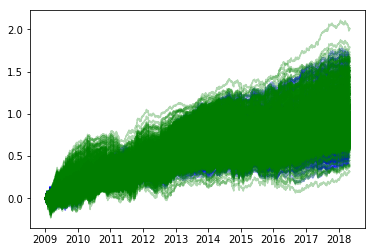

In [5]:
plt.figure()
plt.plot(run1.returns.cumsum(), 'b', alpha=0.3)
plt.plot(run2.returns.cumsum(), 'g', alpha=0.3)
plt.show()

## Analyze all parameters

In [6]:
run1.analyze_parameters()

,Param,Val,Count,MeanTotalRet,MeanSharpe,no_stat
0,holding_period,3,288,0.831815,0.059003,-999.0
1,holding_period,5,288,0.889279,0.066444,-999.0
2,holding_period,7,288,0.864266,0.067635,-999.0
3,model,"{u'max_features': 0.8, u'n_estimators': 30, u'...",432,0.930328,0.070619,-999.0
4,model,{u'type': u'reg'},432,0.793245,0.058102,-999.0
5,per_side_count,10,288,0.856078,0.065143,-999.0
6,per_side_count,20,288,0.695964,0.068388,-999.0
7,per_side_count,5,288,1.033318,0.059550,-999.0
8,response_days,10,432,0.891400,0.066222,-999.0
9,response_days,5,432,0.832173,0.062498,-999.0


In [7]:
run2.analyze_parameters()

,Param,Val,Count,MeanTotalRet,MeanSharpe,no_stat
0,holding_period,3,312,0.960803,0.064256,-999.0
1,holding_period,5,312,0.959694,0.066934,-999.0
2,holding_period,7,312,0.912435,0.065966,-999.0
3,model,"{u'max_features': 0.8, u'n_estimators': 30, u'...",468,1.027155,0.072682,-999.0
4,model,{u'type': u'reg'},468,0.861467,0.058756,-999.0
5,per_side_count,10,312,0.969523,0.068370,-999.0
6,per_side_count,20,312,0.756092,0.069628,-999.0
7,per_side_count,5,312,1.107318,0.059158,-999.0
8,response_days,10,468,0.939621,0.065234,-999.0
9,response_days,5,468,0.949001,0.066203,-999.0


# ComboSearch comparison

In [8]:
CombinationSearch().params

{'training_epochs': 1, 'training_freq': 'm', 'training_periods': 12}

#### Original Longer Hyperparams results

In [9]:
comb1 = CombinationSearch()
comb1.add_run(run1)
comb1.params['training_epochs'] = 10
comb1.start()

Reading and aggregating runs...


  0%|          | 0/10 [00:00<?, ?it/s]

Finished aggregating runs...


100%|██████████| 10/10 [01:52<00:00, 11.66s/it]


In [10]:
comb1s = CombinationSearch()
comb1s.add_run(run1)
comb1s.params['training_epochs'] = 10
comb1s.set_selection_criteria('sharpe')
comb1s.start()

  0%|          | 0/10 [00:00<?, ?it/s]

Reading and aggregating runs...
Finished aggregating runs...


100%|██████████| 10/10 [02:10<00:00, 12.83s/it]


#### Version 4 version

In [11]:
comb2 = CombinationSearch()
comb2.add_run(run2)
comb2.params['training_epochs'] = 10
comb2.start()

Reading and aggregating runs...


  0%|          | 0/10 [00:00<?, ?it/s]

Finished aggregating runs...


100%|██████████| 10/10 [01:54<00:00, 11.11s/it]


In [12]:
comb2s = CombinationSearch()
comb2s.add_run(run2)
comb2s.params['training_epochs'] = 10
comb2s.set_selection_criteria('sharpe')
comb2s.start()

  0%|          | 0/10 [00:00<?, ?it/s]

Reading and aggregating runs...
Finished aggregating runs...


100%|██████████| 10/10 [02:07<00:00, 12.21s/it]


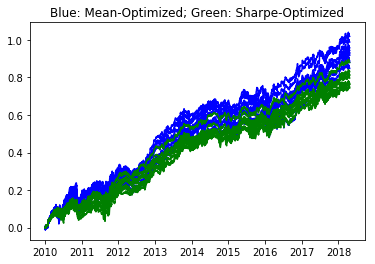

In [13]:
plt.figure()
plt.plot(comb1.best_results_returns.cumsum(), 'b')
plt.plot(comb1s.best_results_returns.cumsum(), 'g')
plt.title('Blue: Mean-Optimized; Green: Sharpe-Optimized')
plt.show()

In [24]:
stats1 = get_stats(comb1.best_results_returns.dropna())
print 'Mean stats across 10 models'
print 'Total Return: ', stats1.loc['Total'].mean()
print 'Avg Sharpe: ', stats1.loc['Sharpe'].mean()
print 'Mean Draw Down: ', stats1.loc['DD%'].mean()
print 'Draw Down Days: ', stats1.loc['DDDays'].mean()
print 'Var 5 perc: ', stats1.loc['VaR_5perc'].mean()

Mean stats across 10 models
Total Return:  0.93039
Avg Sharpe:  1.19601
Mean Draw Down:  -0.11711
Draw Down Days:  175.3
Var 5 perc:  -0.00866


In [25]:
stats1 = get_stats(comb1s.best_results_returns.dropna())
print 'Mean stats across 10 models'
print 'Total Return: ', stats1.loc['Total'].mean()
print 'Avg Sharpe: ', stats1.loc['Sharpe'].mean()
print 'Mean Draw Down: ', stats1.loc['DD%'].mean()
print 'Draw Down Days: ', stats1.loc['DDDays'].mean()
print 'Var 5 perc: ', stats1.loc['VaR_5perc'].mean()

Mean stats across 10 models
Total Return:  0.79208
Avg Sharpe:  1.39529
Mean Draw Down:  -0.07249
Draw Down Days:  120.1
Var 5 perc:  -0.00632


In [16]:
# ORIGINAL - Average across all models
df = rollup_returns(comb1.best_results_returns.mean(axis=1).to_frame())
df['yr'] = df.sum(axis=1)
df

Qtr,1,2,3,4,yr
Year,,,,,
2009,NaN,NaN,NaN,NaN,NaN
2010,0.088943,-0.006593,0.103523,-0.037400,0.148473
2011,0.032657,0.032011,-0.053843,0.096746,0.107571
2012,0.012039,-0.007369,0.032750,0.105821,0.143241
2013,0.021794,0.053645,0.074508,-0.020897,0.129050
2014,0.044294,0.025832,-0.017006,0.020995,0.074114
2015,-0.021194,0.067989,-0.037429,0.037651,0.047017
2016,0.015679,0.003627,0.014034,0.075145,0.108485
2017,0.036527,0.048605,0.013592,0.021188,0.119912


In [17]:
# ORIGINAL - Average across all models
df = rollup_returns(comb1s.best_results_returns.mean(axis=1).to_frame())
df['yr'] = df.sum(axis=1)
df

Qtr,1,2,3,4,yr
Year,,,,,
2009,NaN,NaN,NaN,NaN,NaN
2010,0.073980,-0.015445,0.074517,-0.040948,0.092104
2011,0.038146,0.017275,-0.019811,0.090299,0.125909
2012,0.017718,0.000628,0.026735,0.083785,0.128866
2013,0.000858,0.051119,0.064732,-0.007091,0.109618
2014,0.033578,0.020521,-0.016402,0.021229,0.058926
2015,-0.004828,0.049785,-0.029679,0.044173,0.059451
2016,0.032754,0.000740,0.014222,0.052451,0.100167
2017,0.020079,0.042351,-0.000803,0.017606,0.079233


#### Compare Mean-optimized Models

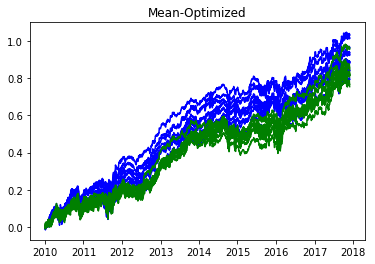

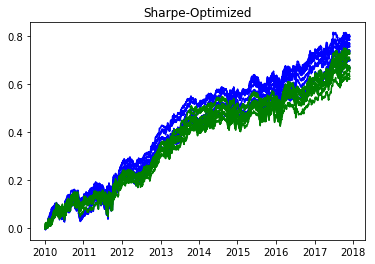

In [13]:
plt.figure()
plt.plot(comb1.best_results_returns.cumsum(), 'b')
plt.plot(comb2.best_results_returns.cumsum(), 'g')
plt.title('Mean-Optimized')
plt.show()

plt.figure()
plt.title('Sharpe-Optimized')
plt.plot(comb1s.best_results_returns.cumsum(), 'b')
plt.plot(comb2s.best_results_returns.cumsum(), 'g')
plt.show()

#### Compare Mean vs Sharpe Optimized for New Models

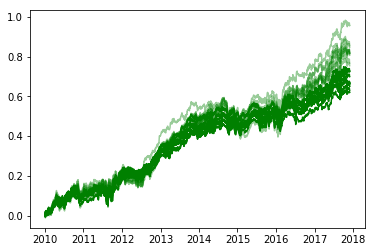

In [14]:
plt.figure()
plt.plot(comb2.best_results_returns.cumsum(), 'g', alpha=0.4)
plt.plot(comb2s.best_results_returns.cumsum(), 'g')
plt.show()

#### Stats for averaged models

In [15]:
stats1 = get_stats(comb1.best_results_returns.dropna())
print 'Mean stats across 10 models'
print 'Total Return: ', stats1.loc['Total'].mean()
print 'Avg Sharpe: ', stats1.loc['Sharpe'].mean()
print 'Mean Draw Down: ', stats1.loc['DD%'].mean()

Mean stats across 10 models
Total Return:  0.9162
Avg Sharpe:  1.24797
Mean Draw Down:  -0.11568


In [16]:
stats2 = get_stats(comb1s.best_results_returns.dropna())
print 'Mean stats across 10 models'
print 'Total Return: ', stats2.loc['Total'].mean()
print 'Avg Sharpe: ', stats2.loc['Sharpe'].mean()
print 'Mean Draw Down: ', stats2.loc['DD%'].mean()

Mean stats across 10 models
Total Return:  0.7441
Avg Sharpe:  1.37491
Mean Draw Down:  -0.07724


In [17]:
stats1

,0,1,2,3,4,5,6,7,8,9
Total,0.9261,0.7937,0.9368,1.0317,0.8884,0.8847,0.8406,1.0152,0.8816,0.9632
Mean,0.0005,0.0004,0.0005,0.0005,0.0004,0.0004,0.0004,0.0005,0.0004,0.0005
Std,0.0062,0.0059,0.0059,0.0060,0.0057,0.0057,0.0056,0.0060,0.0058,0.0058
Skew,-0.0056,-0.0352,-0.0565,0.1313,-0.0024,0.1390,-0.0212,0.2149,0.1579,0.2277
Kurt,3.3800,2.4200,2.8200,3.9000,3.1400,1.8500,2.2300,3.1300,3.5300,2.6100
Sharpe,1.1972,1.0767,1.2710,1.3761,1.2322,1.2444,1.1878,1.3536,1.2082,1.3325
Sortino,2.0694,1.8720,2.1984,2.4162,2.1421,2.2171,2.0751,2.4156,2.1340,2.3978
MinRet,-0.0369,-0.0374,-0.0331,-0.0337,-0.0374,-0.0287,-0.0335,-0.0299,-0.0332,-0.0278
WinP,0.5334,0.5218,0.5263,0.5424,0.5278,0.5283,0.5299,0.5324,0.5339,0.5289
DD%,-0.1477,-0.1196,-0.1225,-0.1132,-0.1191,-0.0992,-0.1086,-0.1073,-0.1125,-0.1071


In [18]:
stats2

,0,1,2,3,4,5,6,7,8,9
Total,0.7564,0.7987,0.6981,0.7966,0.7381,0.7662,0.6682,0.7336,0.7009,0.7842
Mean,0.0004,0.0004,0.0004,0.0004,0.0004,0.0004,0.0003,0.0004,0.0004,0.0004
Std,0.0043,0.0043,0.0043,0.0042,0.0042,0.0043,0.0043,0.0043,0.0042,0.0045
Skew,0.0706,0.1519,0.0955,0.1701,0.1713,0.1356,0.0628,0.2128,0.0585,0.0342
Kurt,2.3100,1.9700,2.3400,1.8100,2.3200,2.9300,2.7800,3.6800,1.9600,2.8000
Sharpe,1.4130,1.4673,1.2832,1.5062,1.3838,1.4051,1.2290,1.3491,1.3206,1.3918
Sortino,2.4868,2.6392,2.2555,2.7167,2.4786,2.4796,2.1537,2.4002,2.3328,2.4244
MinRet,-0.0210,-0.0217,-0.0226,-0.0185,-0.0228,-0.0255,-0.0237,-0.0268,-0.0197,-0.0237
WinP,0.5379,0.5314,0.5329,0.5454,0.5369,0.5379,0.5319,0.5324,0.5359,0.5429
DD%,-0.0842,-0.0655,-0.0853,-0.0602,-0.0723,-0.0839,-0.0820,-0.0964,-0.0662,-0.0764


#### Quarter by Quarter results

In [44]:
# ORIGINAL - Average across all models
df = rollup_returns(comb1.best_results_returns.mean(axis=1).to_frame())
df['yr'] = df.sum(axis=1)
df

Qtr,1,2,3,4,yr
Year,,,,,
2009,NaN,NaN,NaN,NaN,NaN
2010,0.086125,-0.007714,0.096650,-0.037327,0.137734
2011,0.029466,0.035050,-0.046591,0.108556,0.126481
2012,0.007373,0.000145,0.032550,0.110779,0.150847
2013,0.025627,0.045905,0.081490,-0.013097,0.139925
2014,0.045860,0.026303,-0.011159,0.020414,0.081418
2015,-0.014869,0.067726,-0.042711,0.044625,0.054772
2016,0.021846,-0.002787,0.013690,0.077656,0.110405
2017,0.040153,0.050748,0.016119,0.007588,0.114608


In [45]:
df.iloc[:-1].mean()

Qtr
1     0.028775
2     0.023518
3     0.017703
4     0.044515
yr    0.114512
dtype: float64

In [21]:
# UPDATED - Average across all models
df = rollup_returns(comb2.best_results_returns.mean(axis=1).to_frame())
df['yr'] = df.sum(axis=1)
df

Qtr,1,2,3,4,yr
Year,,,,,
2009,NaN,NaN,NaN,NaN,NaN
2010,0.067721,-0.015240,0.083347,-0.020400,0.115427
2011,0.009346,0.043223,-0.053392,0.087310,0.086486
2012,-0.010016,0.001206,0.037861,0.100534,0.129585
2013,0.026719,0.048050,0.076626,-0.006186,0.145208
2014,0.034305,0.009982,-0.012783,-0.013708,0.017796
2015,-0.014924,0.058780,-0.037202,0.036137,0.042791
2016,0.066341,0.006559,0.012750,0.045727,0.131377
2017,0.033023,0.107156,0.031776,-0.015669,0.156287


In [22]:
df.iloc[:-1].mean()

Qtr
1     0.025642
2     0.021794
3     0.015315
4     0.032773
yr    0.095524
dtype: float64

In [23]:
# UPDATED - Average across all models
df = rollup_returns(comb2s.best_results_returns.mean(axis=1).to_frame())
df['yr'] = df.sum(axis=1)
df

Qtr,1,2,3,4,yr
Year,,,,,
2009,NaN,NaN,NaN,NaN,NaN
2010,0.062162,-0.003966,0.071207,-0.030172,0.099231
2011,0.020867,0.022929,-0.032657,0.096388,0.107527
2012,0.009510,-0.007428,0.034490,0.081491,0.118062
2013,-0.001278,0.045737,0.063450,0.004870,0.112779
2014,0.026997,0.022033,-0.022123,0.009434,0.036342
2015,-0.010989,0.051761,-0.032778,0.030340,0.038334
2016,0.057909,-0.028481,0.003829,0.038192,0.071450
2017,0.023623,0.074584,-0.003692,-0.007312,0.087204


In [24]:
df.iloc[:-1].mean()

Qtr
1     0.023597
2     0.014655
3     0.012203
4     0.032935
yr    0.083389
dtype: float64

In [53]:
comb2 = CombinationSearch()
comb2.add_run(run2)
comb2.params['training_epochs'] = 50
comb2.start()

  0%|          | 0/50 [00:00<?, ?it/s]

Reading and aggregating runs...
Finished aggregating runs...


100%|██████████| 50/50 [16:24<00:00, 11.90s/it]


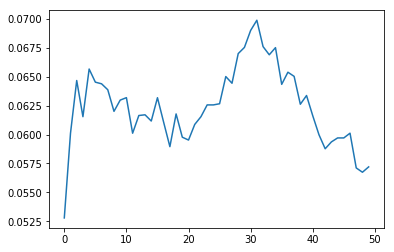

In [55]:
plt.figure()
plt.plot(comb2.epoch_stats.Sharpe)
plt.show()

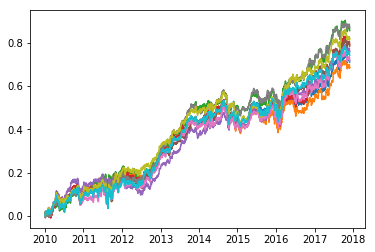

In [58]:
plt.figure()
plt.plot(comb2.best_results_returns.dropna().cumsum())
plt.show()

In [60]:
df = rollup_returns(comb2.best_results_returns.dropna())
df['yr'] = df.sum(axis=1)
df

Qtr,1,2,3,4,yr
Year,,,,,
2010,0.065392,-0.027355,0.072924,0.004803,0.115764
2011,-0.001440,0.056165,-0.051964,0.079514,0.082275
2012,-0.031664,-0.018511,0.037942,0.099534,0.087302
2013,0.028842,0.045949,0.067090,-0.010600,0.131281
2014,0.031572,0.026879,-0.017601,-0.002891,0.037959
2015,-0.013405,0.076075,-0.042775,0.026524,0.046418
2016,0.049114,-0.043072,0.018924,0.037312,0.062278
2017,0.025127,0.113071,0.026114,-0.016978,0.147334
